# Part A - Importing and Understanding Data

#### The first and foremost stage of any data science project is Importing the data and Understanding the dataset in depth. We correctly import the dataset and explore its structure, features and underlying problems in this stage.

In [25]:
%reset -f

In [26]:
#Calling all the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter


In [27]:
#Loading the dataset:
zomato_data = pd.read_csv("./data/zomato_df_final_data.csv")

#Getting a glipse of the dataset
zomato_data.head(3)



,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b


In [28]:
#Checking the Dimension of the dataset:
print("\n The zomato dataset has altogether" , zomato_data.shape[0], "rows and ", zomato_data.shape[1], "columns")

# Visualizing the Data types of every columns in the dataset:
print("\n" "Data types of the columns:", zomato_data.dtypes)


 The zomato dataset has altogether 10500 rows and  17 columns

Data types of the columns: address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


## 1 - Provide plots/graphs to support:

### 1.1 How many unique cuisines are served by Sydney restaurants?

#### The cuisine column contains several list of cuisines in the form of strings or object. First we need to parse all the different cuisines for each row/cell in order to successfully count them.

In [29]:
import ast          # This library is used to effectively identify the strings conatining python list, tupples etc.
from collections import Counter         # This library is used to count the frequency of different elements in a list.

# Using the ast.literal_eval function to convert strings into lists
zomato_data['cuisine'] = zomato_data['cuisine'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Creating single Flat list of all cuisines
cuisine_list = [cuisine for sublist in zomato_data['cuisine'] for cuisine in sublist]

# Counting the frequency of each cuisine
cuisine_counts = Counter(cuisine_list)

# Saving the result to a DataFrame
cuisine_count_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])

# Sorting the DataFrame according to Counts in a descending order
cuisine_count_df = cuisine_count_df.sort_values(by='Count', ascending=False)

# Finding the number of unique cuisines
unique_cuisines_count = len(cuisine_count_df)

# Displaying the result
print("Total number of unique cuisines: ", unique_cuisines_count)


Total number of unique cuisines:  134


##### The total number of unique cuisines served by Sydney restaurants are 134.

#### Making graphs to visualise:

/var/folders/4t/5nz_d09553v4_cz4n9zxh9zh0000gn/T/ipykernel_5852/2830852770.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




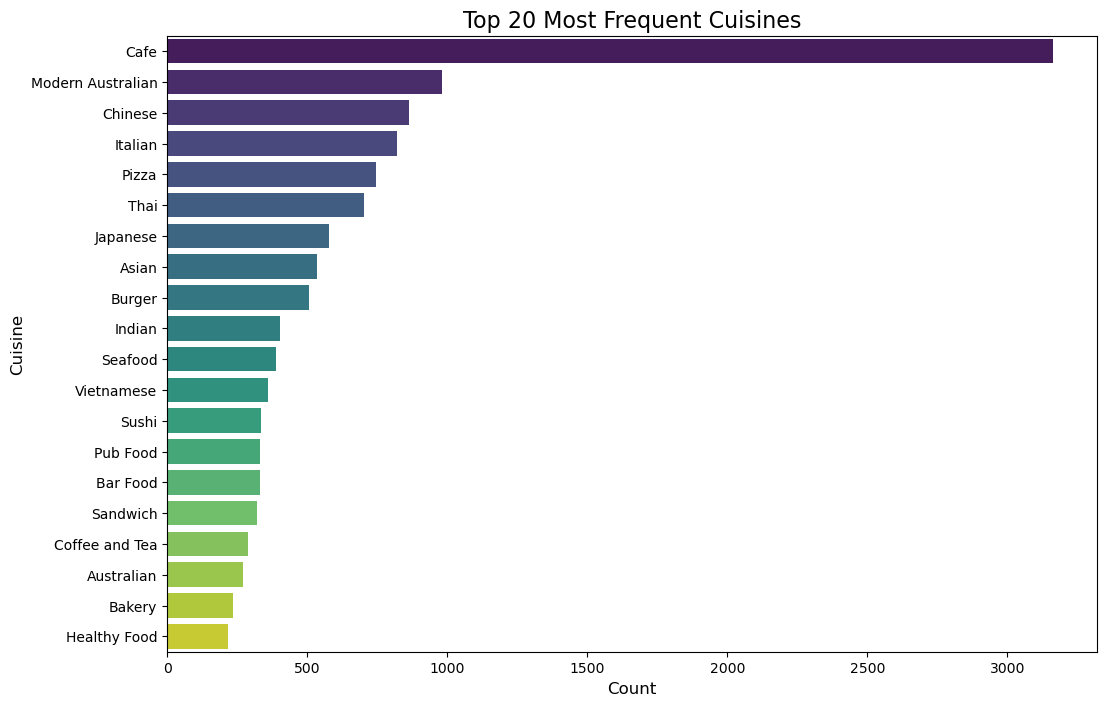

In [30]:
import matplotlib.pyplot as plt         # Used to create visualizations (histograms, scatterplots etc)
import seaborn as sns           # Simplifies visualisation and improves astetics

# Defining plot size
plt.figure(figsize=(12, 8))

# Ploting the top 20 most frequent cuisines for clear visualisation
top_20_cuisines = cuisine_count_df.head(20)

# Creating a bar plot
sns.barplot(x='Count', y='Cuisine', data=top_20_cuisines, palette='viridis')

# Adding the labels and title
plt.title('Top 20 Most Frequent Cuisines', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

# Display the plot
plt.show()

#### Using interactive plot to display all cuisines counts 

In [31]:
import plotly.express as px

# Selecting the top 20 most frequent cuisines
top_20_cuisines = cuisine_count_df.head(20)

# Creating a bar plot using Plotly with vertical orientation
fig = px.bar(top_20_cuisines, 
             x='Cuisine', 
             y='Count', 
             orientation='v',  # Vertical bars
             title='Top 20 Most Frequent Cuisines',
             labels={'Count': 'Count', 'Cuisine': 'Cuisine'},
             height=600)

# Updating layout for better readability
fig.update_layout(
    xaxis_title="Cuisine",
    yaxis_title="Number of restaurants servine the Cuisine",
    title_x=0.5,
    font=dict(size=14),
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Display the plot
fig.show()




### 1.2 Which suburbs (top 3) have the highest number of restaurants?

#### We count the number of restaurants for each suburb and display the top 3.

In [32]:
suburbs_count = zomato_data["subzone"].value_counts()
top_3_suburbs = suburbs_count.head(3)
print("\nThe Suburbs (top 3) having the highest number of restaurants, along with their counts are: ", top_3_suburbs)


The Suburbs (top 3) having the highest number of restaurants, along with their counts are:  subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

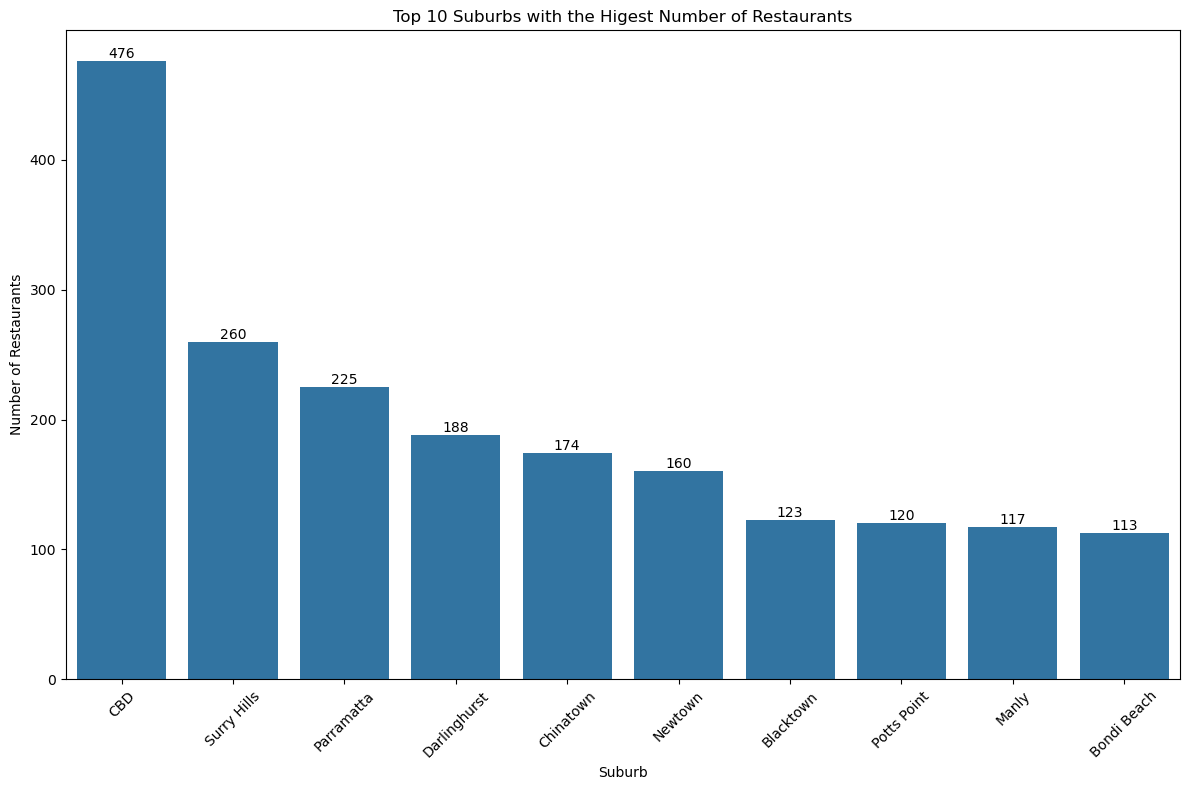

In [33]:
# Plotting only the top 10 suburbs for better visualisation
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x = suburbs_count.head(10).index, y = suburbs_count.head(10).values)
plt.title("Top 10 Suburbs with the Higest Number of Restaurants")
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation = 45)

# Giving labels for counts on top of every bars.
for i in bar_plot.containers:
    bar_plot.bar_label(i)

plt.tight_layout()
plt.show

#### We can clearly see from the graph, Top 3 Suburbs having the highest number of restaurants are CBD, Surry Hills and Paramatta.

### 1.3 “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive ”. Do you agree with this statement or not? Please support your answer with numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')

#### Here, we will make two graphs; first one displaying all the ratings text and second one filtering the restaurants based on their ratings for "excellent" and "poor" and create "bins" of the cost for making bar followed by creating a crosstab that displays the distribution of ratings across different cost categories and finally visualise as a stacked bar chart.

In [34]:
# First finding the maximum and minimum value of 'cost' to correctly create bins.

# Finding the maximum value.
max_cost = zomato_data['cost'].max()

# Finding the minimum value.
min_cost = zomato_data['cost'].min()

print("Maximum cost: ", max_cost)
print("Minimum cost: ", min_cost)


Maximum cost:  500.0
Minimum cost:  8.0


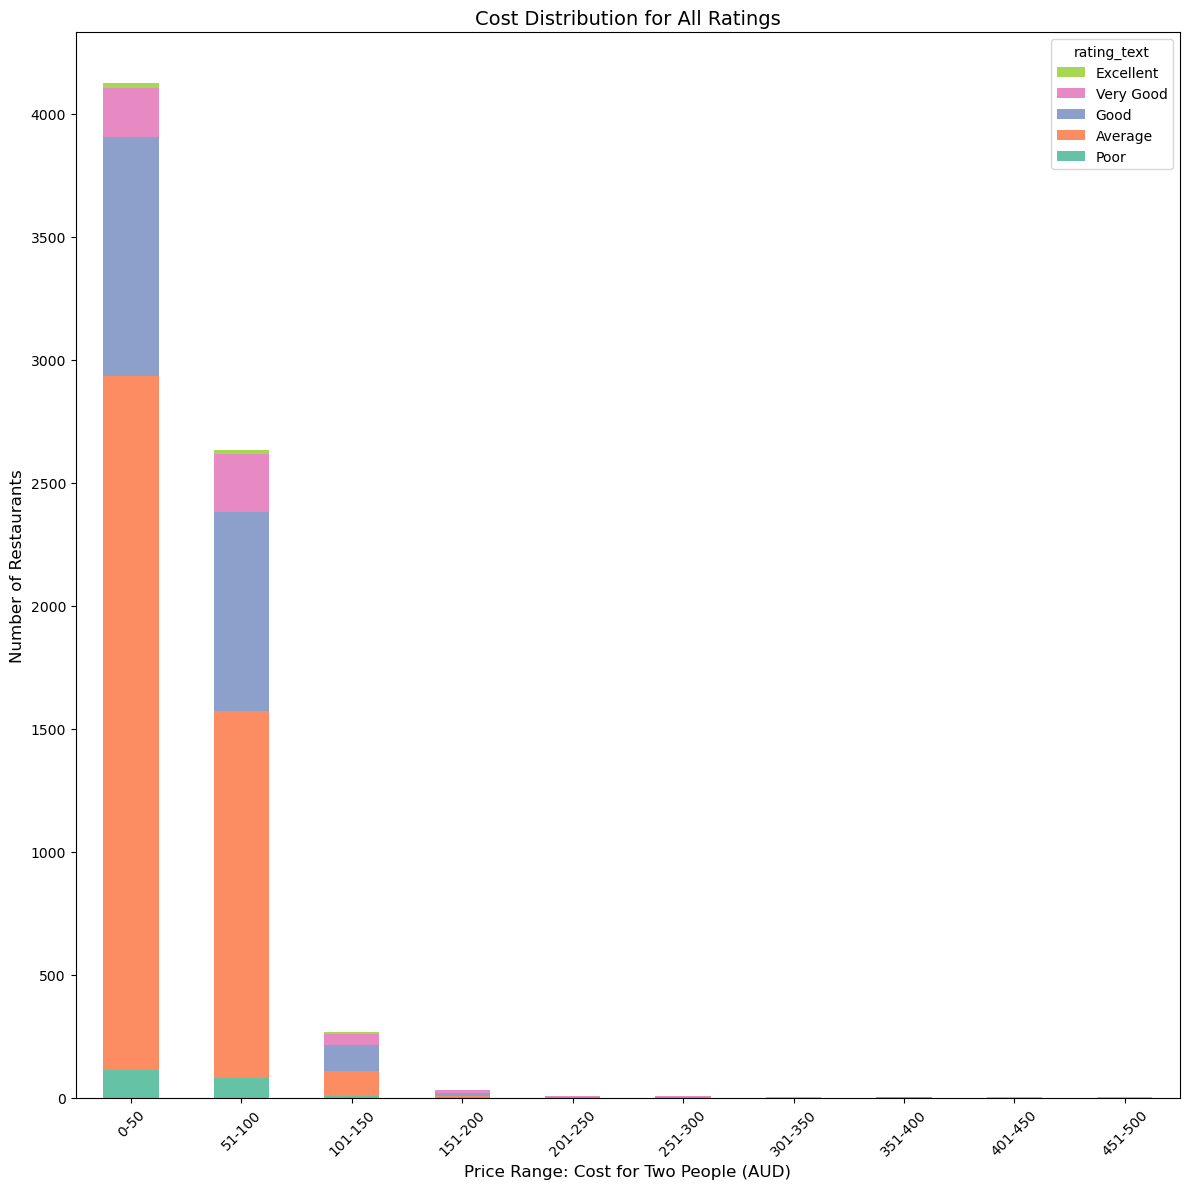

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows with missing 'cost', 'rating_text', or 'rating_number', and ignoring NaN cells
zomato_data_filtered = zomato_data.dropna(subset=['cost', 'rating_text', 'rating_number']).copy()

# Creating bins for cost categories to make it easier to visualize
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Using .loc to assign the new 'cost_category' column
zomato_data_filtered.loc[:, 'cost_category'] = pd.cut(zomato_data_filtered['cost'], bins=bins, labels=labels)

# Reordering the 'rating_text' column to have 'Excellent' on top and 'Poor' at the bottom
rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
zomato_data_filtered['rating_text'] = pd.Categorical(zomato_data_filtered['rating_text'], categories=rating_order, ordered=True)

# Creating the crosstab for the stacked bar chart
crosstab_data = pd.crosstab(zomato_data_filtered['cost_category'], zomato_data_filtered['rating_text'])

# Plot the stacked bar chart
plt.figure(figsize=(12,12))

# Define color palette for the different ratings
palette = sns.color_palette("Set2", len(crosstab_data.columns))

# Plot the stacked bar chart with all ratings, stacked according to the specified order
ax = crosstab_data[rating_order].plot(kind='bar', stacked=True, color=palette, figsize=(12, 12), ax=plt.gca())
plt.title('Cost Distribution for All Ratings', fontsize=14)
plt.xlabel('Price Range: Cost for Two People (AUD)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)

# Adjusting the legend to have "Excellent" on top and "Poor" on bottom
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="rating_text")

plt.tight_layout()
plt.show()


#### Using Interactive Plot; plotly for above

In [36]:
import plotly.express as px
import pandas as pd

# Filtering out rows with missing 'cost', 'rating_text', or 'rating_number', and ignoring NaN cells
zomato_data_filtered = zomato_data.dropna(subset=['cost', 'rating_text', 'rating_number']).copy()

# Creating bins for cost categories to make it easier to visualize
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Using .loc to assign the new 'cost_category' column
zomato_data_filtered.loc[:, 'cost_category'] = pd.cut(zomato_data_filtered['cost'], bins=bins, labels=labels)

# Reordering the 'rating_text' column to have 'Excellent' on top and 'Poor' at the bottom
rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
zomato_data_filtered['rating_text'] = pd.Categorical(zomato_data_filtered['rating_text'], categories=rating_order, ordered=True)

# Creating the crosstab for the stacked bar chart
crosstab_data = pd.crosstab(zomato_data_filtered['cost_category'], zomato_data_filtered['rating_text'])

# Resetting index for easier manipulation in plotly
crosstab_data = crosstab_data.reset_index()

# Melting the data to long format for plotly
crosstab_melted = pd.melt(crosstab_data, id_vars='cost_category', value_vars=rating_order, var_name='rating_text', value_name='count')

# Creating the stacked bar plot using Plotly
fig = px.bar(crosstab_melted, 
             x='cost_category', 
             y='count', 
             color='rating_text', 
             title='Cost Distribution for All Ratings',
             labels={'cost_category': 'Price Range: Cost for Two People (AUD)', 'count': 'Number of Restaurants'},
             color_discrete_sequence=px.colors.qualitative.Set2,
             category_orders={'rating_text': rating_order})

# Adjusting layout for better readability
fig.update_layout(barmode='stack', 
                  xaxis_title='Price Range: Cost for Two People (AUD)', 
                  yaxis_title='Number of Restaurants',
                  title_x=0.5)

# Display the plot
fig.show()


#### Cost Distribution for "Excellent" and "Poor" Ratings only.

In [37]:
import plotly.express as px
import pandas as pd

# Filtering rows where 'rating_text' is either 'Excellent' or 'Poor'
zomato_data_filtered = zomato_data.dropna(subset=['cost', 'rating_text']).copy()
zomato_data_filtered = zomato_data_filtered[zomato_data_filtered['rating_text'].isin(['Excellent', 'Poor'])]

# Creating bins for cost categories to make it easier to visualize
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Assigning new 'cost_category' column
zomato_data_filtered['cost_category'] = pd.cut(zomato_data_filtered['cost'], bins=bins, labels=labels)

# Creating the crosstab for the stacked bar chart
crosstab_data = pd.crosstab(zomato_data_filtered['cost_category'], zomato_data_filtered['rating_text']).reset_index()

# Melting the data to long format for plotly
crosstab_melted = pd.melt(crosstab_data, id_vars='cost_category', value_vars=['Excellent', 'Poor'], 
                          var_name='rating_text', value_name='count')

# Define custom colors for 'Excellent' and 'Poor'
custom_colors = ['skyblue', 'yellow']

# Plotting with Plotly
fig = px.bar(crosstab_melted, 
             x='cost_category', 
             y='count', 
             color='rating_text', 
             title='Cost Distribution for Excellent and Poor Ratings',
             labels={'cost_category': 'Price Range: Cost for Two People (AUD)', 'count': 'Number of Restaurants'},
             color_discrete_sequence=custom_colors)

# Adjusting layout for better readability
fig.update_layout(barmode='stack',
                  xaxis_title="Price Range: Cost for Two People (AUD)", 
                  yaxis_title="Number of Restaurants",
                  title_x=0.5)

fig.show()


In [38]:
# Displaying the counts for Excellent and Poor for each bin
print("Counts for Excellent and Poor Ratings in Each Cost Category:")
print(crosstab_data)

Counts for Excellent and Poor Ratings in Each Cost Category:
rating_text cost_category  Excellent  Poor
0                    0-50         21   113
1                  51-100         16    82
2                 101-150          8     5
3                 151-200          1     1
4                 251-300          1     0
5                 301-350          1     0
6                 401-450          1     0
7                 451-500          2     0


#### Initial Statement: “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive ”
#### Insights from our result:
##### - Around 21 restaurants with "excellent" ratings fall under the lowest bin values of "Cost" and around 16-24 restaurants fall under lower mid bin values of cost. Only 6 restaurants with excellent ratings have a higher cost.
##### - So, we can say that “Restaurants with ‘excellent’ ratings are not always costly.
##### - Also, most of Restaurants(113 - 195 restaurants) having "lower cost" do have poor ratings as well. As the cost increases, number of "Poor" rated restaurants decreases. And, the restaurants that are highly costly don't have any "poor" ratings.
##### - So, we can say that, “Restaurants with ‘Poor’ ratings are rarely expensive ”

##### - Hence, This analysis does not fully support the statement that restaurants with “Excellent” ratings are mostly costly while those with “Poor” ratings are rarely expensive. We can find both the "excellent" and "poor" rated restaurants in the low cost categories.

## 2- Perform exploratory analysis for the variables of the data. This can be performed at least for the following variables. "Cost", "Rating" & "Type".

#### In the EDA stage; we examine the data in detail and try to explore every trends, patterns and insights using visualisations and descriptive statistics. EDA involves analysing and summarizing the most important features and characteristics of the dataset with the help of statistical graphs or interactive plots and summary tables. This stage is crucial in order to have in-depth understanding of data's structure and underlying relationships between the given features. EDA optimizes the data analysis process and aids in the development of accurate models by reducing the risk of errors.

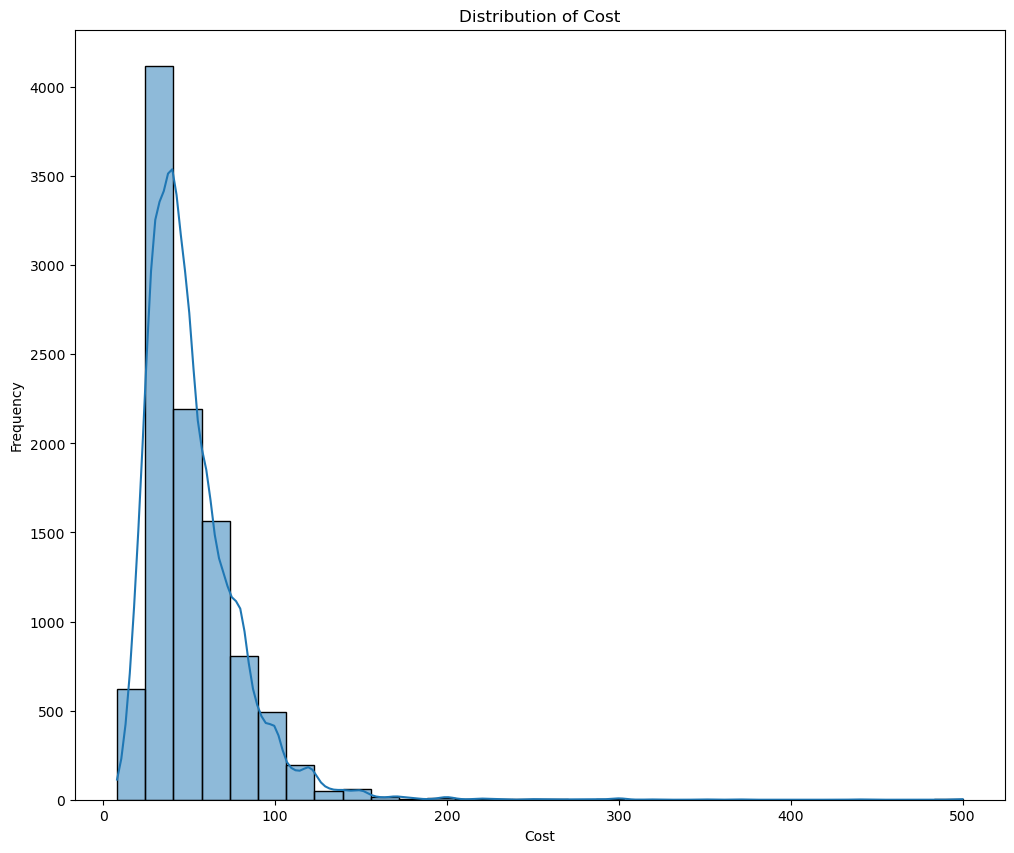

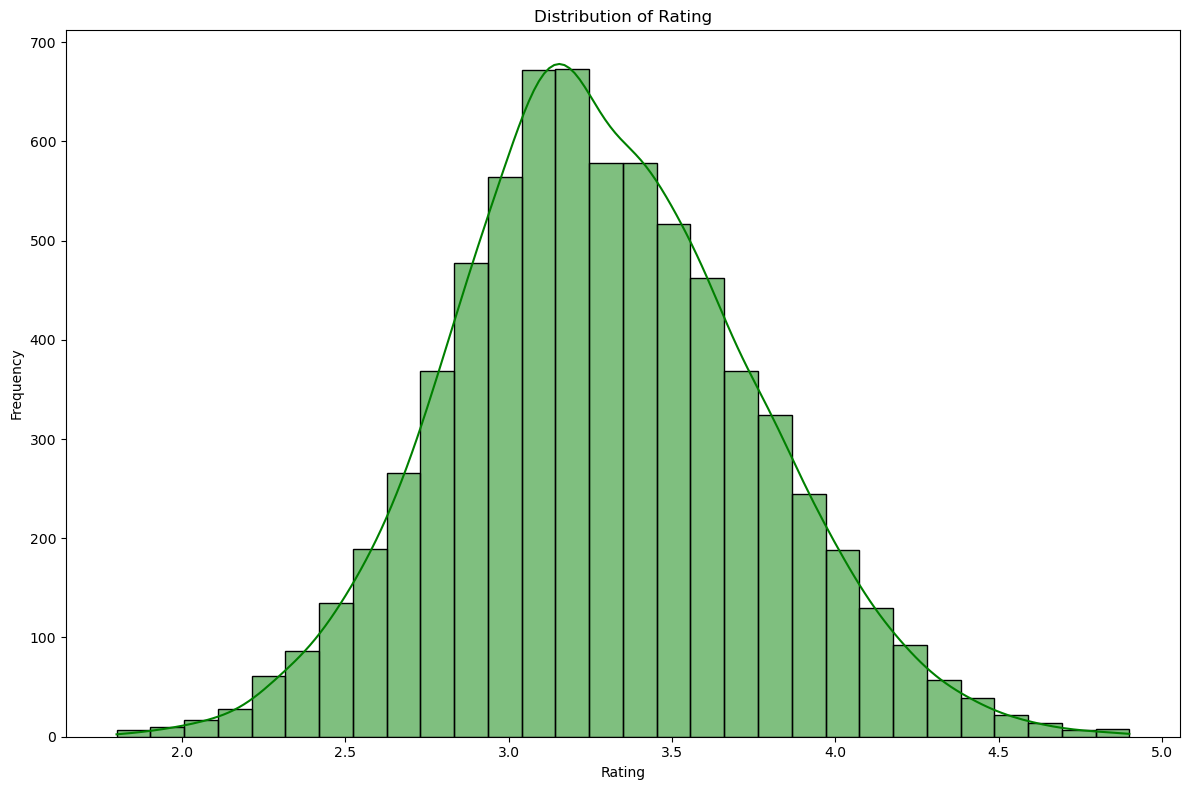

               cost  rating_number
count  10154.000000    7184.000000
mean      51.153240       3.283672
std       27.799485       0.454580
min        8.000000       1.800000
25%       30.000000       3.000000
50%       45.000000       3.300000
75%       60.000000       3.600000
max      500.000000       4.900000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating Descriptive statistics for 'cost', 'rating_number', and 'type'
descriptive_stats_cleaned = zomato_data[['cost', 'rating_number', 'type']].describe()

# Plot histograms and distribution plots for 'cost' and 'rating_number'

# Making Histogram Plot for 'cost'
plt.figure(figsize=(12, 10))
sns.histplot(zomato_data['cost'].dropna(), kde=True, bins=30)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')

# Making Histogram Plot for 'rating_number'
plt.figure(figsize=(12, 8))
sns.histplot(zomato_data['rating_number'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display descriptive statistics for cleaned data
print(descriptive_stats_cleaned)


#### Insights: 
##### - From the graph of "Distribution of Cost", we can visualise that most of the restaurants have the cost between 0-100 AUD. Only a few number of restaurants are highly costly (100-500 AUD).
##### - From the graph of "Distribution of Rating", we can visualise that large number of restaurants have the "Average" ratings.


#### Lets make box plots for visualising any outliers and other statistical information.

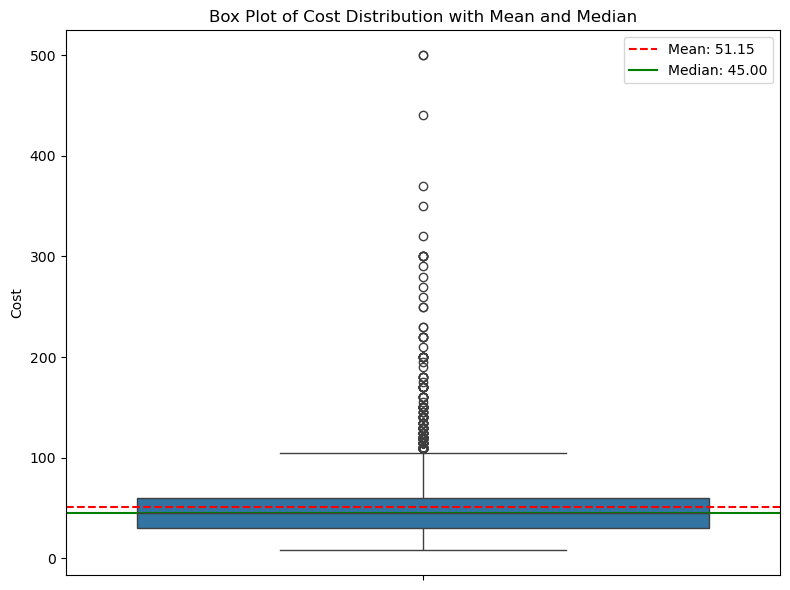

In [40]:
# Seting figure for the plot
plt.figure(figsize=(8, 6))

# Creating the box plot
sns.boxplot(y='cost', data=zomato_data)

# Calculating the mean and median
mean_cost = zomato_data['cost'].mean()
median_cost = zomato_data['cost'].median()

# Adding mean and median lines to the plot
plt.axhline(mean_cost, color='r', linestyle='--', label=f'Mean: {mean_cost:.2f}')
plt.axhline(median_cost, color='g', linestyle='-', label=f'Median: {median_cost:.2f}')

# Adding title and labels
plt.title('Box Plot of Cost Distribution with Mean and Median')
plt.ylabel('Cost')

# Adding a legend to display mean and median values
plt.legend()

plt.tight_layout()
plt.show()


##### From the box plot we can see that the Mean for Cost is 51.15 AUD. There are several outliers in the data, meaning some restaurants have a very high cost compared to most of other restaurants. The plot is right-skewed, suggesting the majority of restaurants have low cost distribution.

#### Now lets make box-plot for rating number.

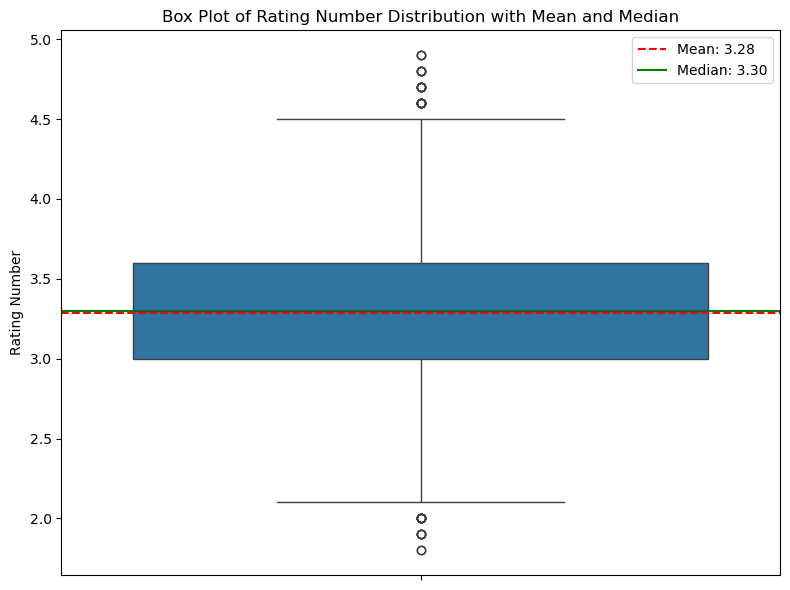

In [41]:
plt.figure(figsize=(8, 6))

# Creating box plot for rating_number
sns.boxplot(y='rating_number', data=zomato_data)

# Calculating mean and median
mean_rating = zomato_data['rating_number'].mean()
median_rating = zomato_data['rating_number'].median()

# Adding mean and median lines to the plot for visualisation
plt.axhline(mean_rating, color='r', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axhline(median_rating, color='g', linestyle='-', label=f'Median: {median_rating:.2f}')

# Adding title and labels
plt.title('Box Plot of Rating Number Distribution with Mean and Median')
plt.ylabel('Rating Number')

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


##### From the box plot of rating, we can see that the mean rating is 3.28. The distribution is approximately symmetrical. There are some Outliers on both lower and upper ends, meaning some restaurants have very low ratings and some restaurants have a very high rating.

#### Now, lets make plot to visualise what "type" of restaurant are mostly present in the dataset.

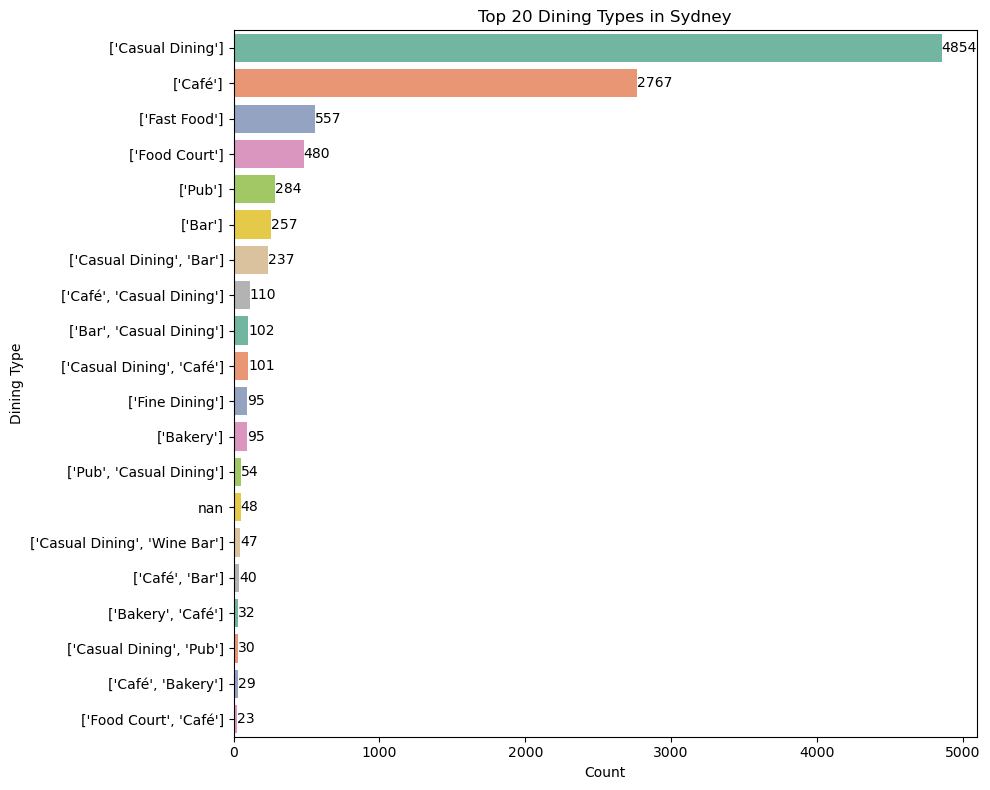

In [42]:

# Making plot to visualise number of "type" of restaurants
plt.figure(figsize=(10, 8))

# Get the top 20 'type' values
top_20_types = zomato_data['type'].apply(lambda x: str(x)).value_counts().nlargest(20)

# Create a count plot for the top 20 types
barplot = sns.barplot(y=top_20_types.index, x=top_20_types.values, palette="Set2", hue=top_20_types.index, legend= False)

# Add the count labels above each bar
for index, value in enumerate(top_20_types.values):
    barplot.text(value, index, f'{int(value)}', color='black', va="center")

plt.title('Top 20 Dining Types in Sydney')
plt.xlabel('Count')
plt.ylabel('Dining Type')

plt.tight_layout()
plt.show()

##### we can see that, In the dataset, the 'type' column has values such as ['Casual Dining','Bar'] and ['Bar', 'Casual Dining'], which are the same but read different by our code, and the graphs also shows  as different. Lets modify code to treat such elements as same.

In [43]:
# Modify the 'type' column by sorting the list inside each entry, safely parsing the string
zomato_data['type'] = zomato_data['type'].apply(lambda x: ', '.join(sorted(ast.literal_eval(x))) if isinstance(x, str) else x)

In [44]:
import plotly.express as px
import ast  # For safely parsing string representations of lists

# Get the top 20 'type' values after modification
top_20_types = zomato_data['type'].value_counts().nlargest(20).reset_index()

# Rename columns for better clarity
top_20_types.columns = ['type', 'count']

# Create a bar plot using Plotly
fig = px.bar(top_20_types, 
             x='count', 
             y='type', 
             orientation='h', 
             title='Top 20 Dining Types in Sydney (After Cleaning)',
             labels={'count': 'Count', 'type': 'Dining Type'},
             text='count',  # Add the count labels above each bar
             color='type',  # Use the type for color differentiation
             color_discrete_sequence=px.colors.qualitative.Set2)

# Adjust the layout for better readability
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Dining Type",
    title_x=0.5,
    showlegend=False,  # No need for a legend as each bar is already labeled
    height=600
)

fig.show()


#### Insight:
##### We can see from the graph that, "Casual Dining", "Cafe", "Fast Food" and "Food Court" are the most common "type" of restaurants in Sydney.

#### Making plot to visualise the top 20 suburbs with the highest average cost (most expensive) restaurants

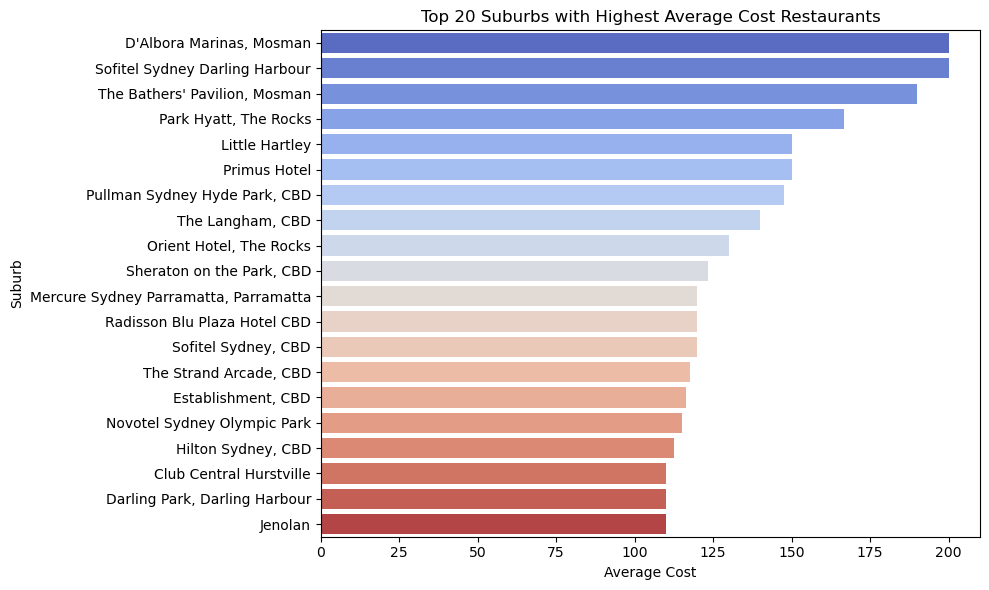

In [45]:
# Firstly, finding the top 20 suburbs based on their average cost
top_20_suburbs = zomato_data.groupby('subzone')['cost'].mean().nlargest(20)

# Creating a bar plot for the top 20 suburbs with the highest average cost
plt.figure(figsize=(10, 6))
sns.barplot(y=top_20_suburbs.index, x=top_20_suburbs.values, palette="coolwarm", hue=top_20_suburbs.index, legend= False)
plt.title('Top 20 Suburbs with Highest Average Cost Restaurants')
plt.xlabel('Average Cost')
plt.ylabel('Suburb')

plt.tight_layout()
plt.show()


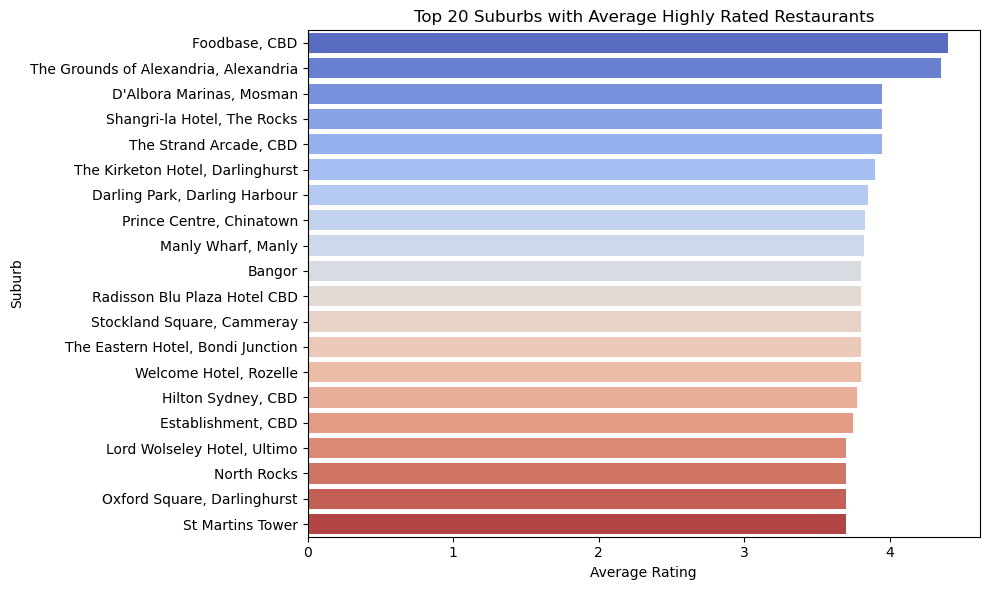

In [46]:
# Create a histogram for the top 20 suburbs with the highest rated restaurants

# First, find the top 20 suburbs based on their average rating
top_20_rated_suburbs = zomato_data.groupby('subzone')['rating_number'].mean().nlargest(20)

# Create a bar plot for the top 20 suburbs with the highest average rating
plt.figure(figsize=(10, 6))
sns.barplot(y=top_20_rated_suburbs.index, x=top_20_rated_suburbs.values, hue=top_20_rated_suburbs.index, palette="coolwarm", dodge=False, legend=False)
plt.title('Top 20 Suburbs with Average Highly Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Suburb')

plt.tight_layout()
plt.show()


#### Now, lets make some visualisations using scatterplot:

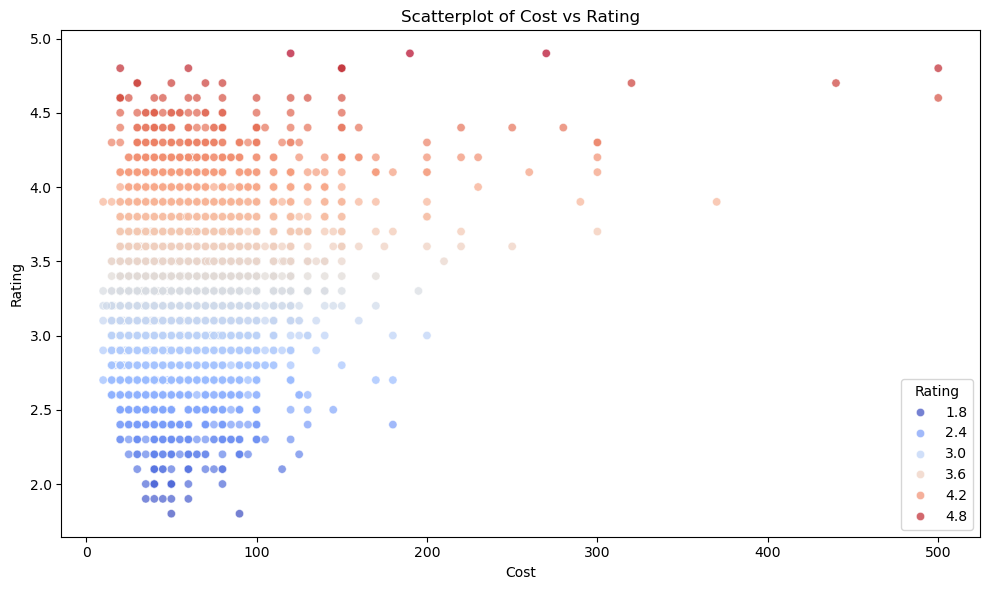

/var/folders/4t/5nz_d09553v4_cz4n9zxh9zh0000gn/T/ipykernel_5852/2927862194.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




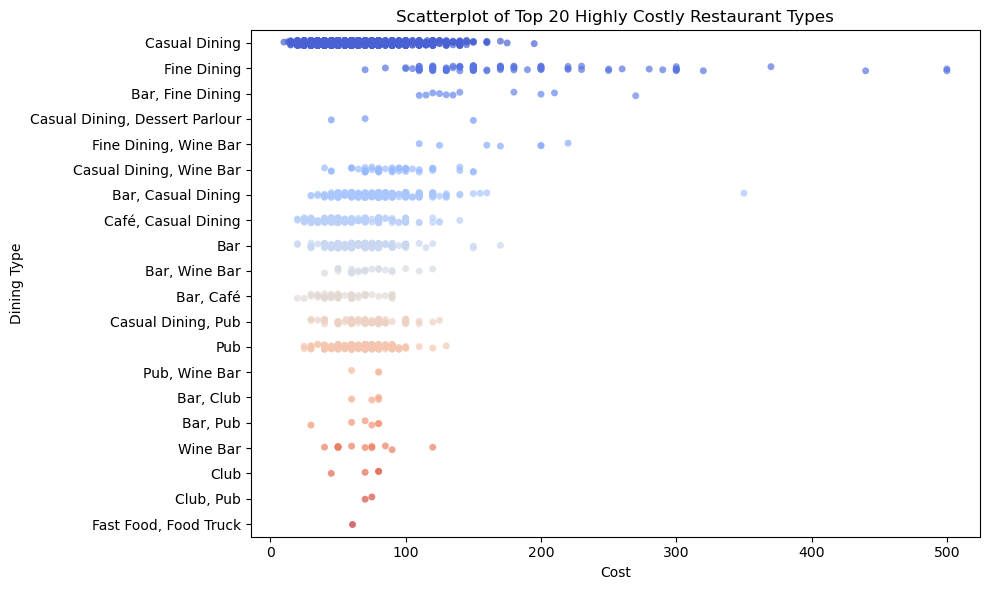

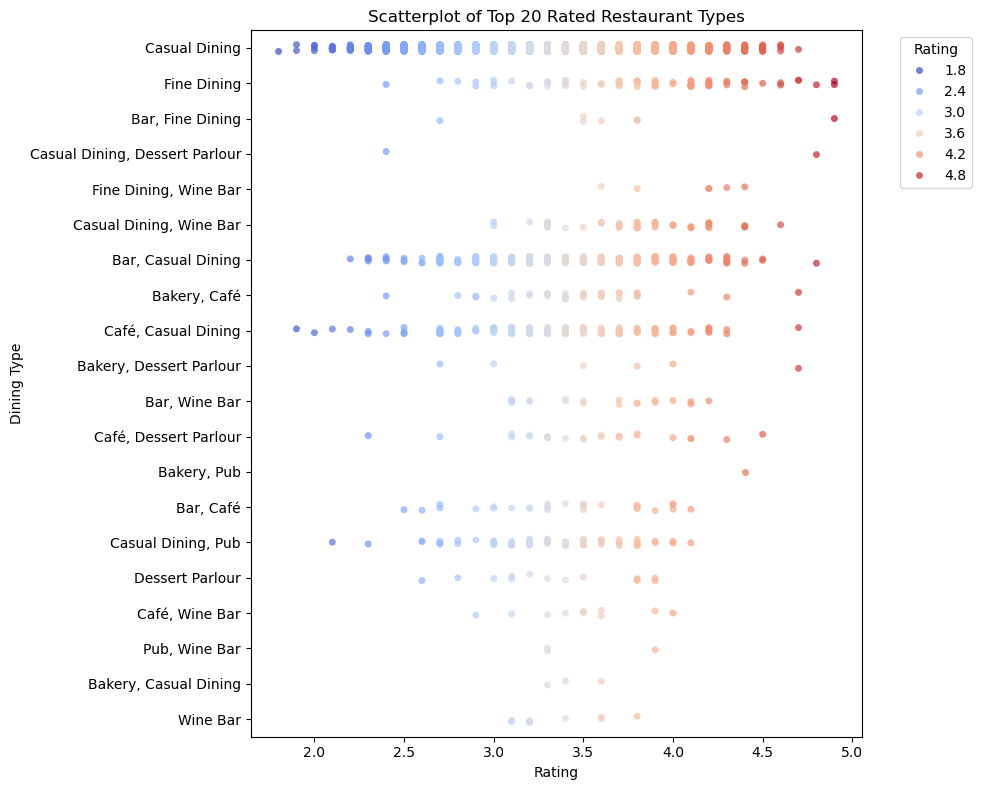

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Cost vs Rating with different colors for ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_data, x='cost', y='rating_number', hue='rating_number', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot of Cost vs Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


# Get the top 20 dining types with the highest average cost
top_20_costly_types = zomato_data.groupby('type')['cost'].mean().nlargest(20).index
# Filter the dataset to include only the top 20 costly types
filtered_df = zomato_data[zomato_data['type'].isin(top_20_costly_types)]
# Scatter plot for Cost vs Type (using jitter to separate points for categorical type)
plt.figure(figsize=(10, 6))
sns.stripplot(data=filtered_df, y='type', x='cost', jitter=True, alpha=0.7, palette='coolwarm')
plt.title('Scatterplot of Top 20 Highly Costly Restaurant Types')
plt.ylabel('Dining Type')
plt.xlabel('Cost')
plt.tight_layout()
plt.show()


# Get the top 20 dining types with the highest average rating
top_20_rated_types = zomato_data.groupby('type')['rating_number'].mean().nlargest(20).index
# Filter the dataset to include only the top 20 types by rating
filtered_df = zomato_data[zomato_data['type'].isin(top_20_rated_types)]
# Scatter plot for Rating vs Type (using jitter for categorical type and color for different ratings)
plt.figure(figsize=(10, 8))
# Add hue based on the rating to give different colors
sns.stripplot(data=filtered_df, y='type', x='rating_number', jitter=True, alpha=0.7, hue='rating_number', palette='coolwarm')

plt.title('Scatterplot of Top 20 Rated Restaurant Types')
plt.ylabel('Dining Type')
plt.xlabel('Rating')
# Add legend for the rating colors
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





## 3- Produce Cuisine Density Map: 

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Sydney suburbs GeoJSON file
geojson_file_path = './data/sydney.geojson'
sydney_suburbs = gpd.read_file(geojson_file_path)

# Loading the Zomato dataset
zomato_data_geo = pd.read_csv('./data/zomato_df_final_data.csv')

# Creating a GeoDataFrame for the Zomato data using provided latitude and longitude
zomato_geo = gpd.GeoDataFrame(zomato_data_geo, geometry=gpd.points_from_xy(zomato_data_geo.lng, zomato_df.lat), crs="EPSG:4326")

# Spatial join to assign each restaurant to the corresponding suburb
restaurants_in_suburbs = gpd.sjoin(zomato_geo, sydney_suburbs, how="inner", predicate="within")

# Removing unnecessary characters in 'cuisine' column
restaurants_in_suburbs['cuisine'] = restaurants_in_suburbs['cuisine'].str.strip("[]").str.replace("'", "")

# Function to count restaurants for a given cuisine type
def count_restaurants_by_cuisine(cuisine_type):
    filtered_restaurants = restaurants_in_suburbs[restaurants_in_suburbs['cuisine'].str.contains(cuisine_type, case=False)]
    cuisine_density = filtered_restaurants.groupby('SSC_NAME').size().reset_index(name=f'{cuisine_type}_count')
    return cuisine_density

# Count restaurants for Chinese, Indian, and Italian cuisines
chinese_density = count_restaurants_by_cuisine('Chinese')
indian_density = count_restaurants_by_cuisine('Indian')
italian_density = count_restaurants_by_cuisine('Italian')

# Merge the counts with the suburb GeoDataFrame
sydney_suburbs = sydney_suburbs.merge(chinese_density, how="left", on="SSC_NAME")
sydney_suburbs = sydney_suburbs.merge(indian_density, how="left", on="SSC_NAME")
sydney_suburbs = sydney_suburbs.merge(italian_density, how="left", on="SSC_NAME")

# Filling NaN values with 0
sydney_suburbs['Chinese_count'] = sydney_suburbs['Chinese_count'].fillna(0)
sydney_suburbs['Indian_count'] = sydney_suburbs['Indian_count'].fillna(0)
sydney_suburbs['Italian_count'] = sydney_suburbs['Italian_count'].fillna(0)

# Ploting the maps for each cuisine
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chinese cuisine density map
sydney_suburbs.plot(column='Chinese_count', ax=axes[0], legend=True, cmap='Reds')
axes[0].set_title('Density of Chinese Restaurants')

# Indian cuisine density map
sydney_suburbs.plot(column='Indian_count', ax=axes[1], legend=True, cmap='Greys')
axes[1].set_title('Density of Indian Restaurants')

# Italian cuisine density map
sydney_suburbs.plot(column='Italian_count', ax=axes[2], legend=True, cmap='Blues')
axes[2].set_title('Density of Italian Restaurants')

plt.tight_layout()
plt.show()


RecursionError: maximum recursion depth exceeded while calling a Python object

## 4. Please investigate employing interactive plotting libraries (such as Bokeh, Plotly, ... etc.) in a use case where you think the non-interactive plotting is limiting. Explain the limitation and how the interactive libraries will solve it.

In [ ]:
import plotly.express as px

# Example data
fig = px.scatter(zomato_data, 
                 x='cost', 
                 y='rating_number', 
                 color='type',
                 hover_data=['subzone', 'title'], 
                 title="Interactive Scatter Plot: Cost vs Rating")

# Add sliders or other interactive elements (optional)
fig.update_layout(legend_title_text='Dining Type')

fig.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

output_notebook()

# Create a scatter plot in Bokeh
p = figure(title="Bokeh Interactive Scatter Plot: Cost vs Rating",
           x_axis_label='Cost', 
           y_axis_label='Rating',
           tools="pan,wheel_zoom,box_zoom,reset")

# Add data points with hover information
p.circle(x='cost', y='rating_number', size=10, source=zomato_data, fill_color="navy", fill_alpha=0.6)

# Add hover tool to display additional information
hover = HoverTool()
hover.tooltips = [("Restaurant", "@title"), ("Cost", "@cost"), ("Rating", "@rating_number")]
p.add_tools(hover)

# Show the interactive plot
show(p)


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Filtering rows where 'rating_text' is either 'Excellent' or 'Poor'
zomato_data_filtered = zomato_data.dropna(subset=['cost', 'rating_text']).copy()
zomato_data_filtered = zomato_data_filtered[zomato_data_filtered['rating_text'].isin(['Excellent', 'Poor'])]

# Creating bins for cost categories to make it easier to visualize
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Using .loc to assign the new 'cost_category' column
zomato_data_filtered.loc[:, 'cost_category'] = pd.cut(zomato_data_filtered['cost'], bins=bins, labels=labels)

# Creating the crosstab for the stacked bar chart
crosstab_data = pd.crosstab(zomato_data_filtered['cost_category'], zomato_data_filtered['rating_text'])

# Create the interactive stacked bar chart using Plotly
fig = go.Figure()

# Adding bars for 'Excellent' ratings
fig.add_trace(go.Bar(
    x=crosstab_data.index,
    y=crosstab_data['Excellent'],
    name='Excellent',
    marker_color='skyblue'
))

# Adding bars for 'Poor' ratings
fig.add_trace(go.Bar(
    x=crosstab_data.index,
    y=crosstab_data['Poor'],
    name='Poor',
    marker_color='yellow'
))

# Update layout for the interactive plot
fig.update_layout(
    barmode='stack',
    title='Cost Distribution for Excellent and Poor Ratings',
    xaxis_title='Price Range: Cost for Two People (AUD)',
    yaxis_title='Number of Restaurants',
    xaxis_tickangle=-45,
    yaxis=dict(tickmode='linear', tick0=0, dtick=20),
    legend_title_text='Rating Text',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Grouping to get the mean cost per restaurant type
grouped_cost_type = zomato_data.groupby('type')['cost'].mean().reset_index()

# Sorting the grouped data by mean cost in descending order to find the top 20 most expensive types
top_20_expensive_types = grouped_cost_type.sort_values(by='cost', ascending=False).head(20)

# Bar plot for Cost vs Type (Top 20 Most Expensive Restaurant Types)
fig1 = px.bar(top_20_expensive_types, x='type', y='cost', title='Top 20 Most Expensive Restaurant Types',
              labels={'cost': 'Mean Cost', 'type': 'Restaurant Type'})

# Plot layout
fig1.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title='Restaurant Type', yaxis_title='Mean Cost')
fig1.update_xaxes(tickangle=45)

fig1.show()




#### Interactive Vs Non-Interactive Plots:
##### - The non-interactive plots like Matplotlib and Seaborn are good for simpler static plots, but they do have countable limitations when handling large datasets like this (zomato dataset). Interactive plotting libraries like Plotly and Bokeh offer enhanced features that aids users to explore the data in a more dynamic and insightful way, solving the limitations of static visualizations by enabling real-time interactions, better quality visualisations, data display, optimised filtering, and zooming.